In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# each point is height, weight, shoe-size & gender (0.1)
# 0 for male and 1 for female
data = [[1.81, 0.80, 0.44, 0],
        [1.77, 0.70, 0.43, 0],
        [1.60, 0.60, 0.38, 1],
        [1.54, 0.54, 0.37, 1],
        [1.66, 0.65, 0.40, 0],
        [1.90, 0.90, 0.47, 0],
        [1.75, 0.64, 0.39, 1],
        [1.77, 0.70, 0.40, 1],
        [1.59, 0.55, 0.37, 1],
        [1.71, 0.75, 0.42, 0],
        [1.81, 0.85, 0.43, 0]]

mystery_person = [1.63, 0.60, 0.37]

In [4]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

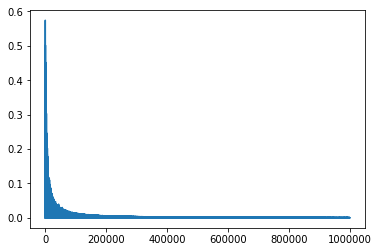

In [5]:
# training loop
learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
b = np.random.randn()

for i in range(100000000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
    prediction = sigmoid(z)
    
    target = point[3]
    cost = np.square(prediction - target)
    
    dcost_prediction = 2 * (prediction - target)
    dprediction_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_db = 1
    
    dcost_dz = dcost_prediction * dprediction_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
            prediction = sigmoid(z)
            
            target = point[3]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [6]:
# prediction
for i in range(len(data)) :
    point = data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
    prediction = sigmoid(z)
    print("prediction : {}" .format(prediction))

[1.81, 0.8, 0.44, 0]
prediction : 6.623984447566355e-11
[1.77, 0.7, 0.43, 0]
prediction : 0.003603770271667386
[1.6, 0.6, 0.38, 1]
prediction : 0.9759478362611343
[1.54, 0.54, 0.37, 1]
prediction : 0.9999445043421884
[1.66, 0.65, 0.4, 0]
prediction : 0.03091078180040532
[1.9, 0.9, 0.47, 0]
prediction : 7.362207580238131e-18
[1.75, 0.64, 0.39, 1]
prediction : 0.9999999311178956
[1.77, 0.7, 0.4, 1]
prediction : 0.9798259874805646
[1.59, 0.55, 0.37, 1]
prediction : 0.9999998656937445
[1.71, 0.75, 0.42, 0]
prediction : 1.2518522507678595e-10
[1.81, 0.85, 0.43, 0]
prediction : 4.0039259735179463e-14


In [7]:
z = mystery_person[0] * w1 + mystery_person[1] * w2 + mystery_person[2] * w3 + b
prediction = sigmoid(z)
prediction

0.99999215407326159

In [12]:
def guess_gender(height, weight, shoe_size) :
    z = height * w1 + weight * w2 + shoe_size * w3 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('male')
    else:
        print('female')

In [21]:
guess_gender(1.85, 0.82, 0.43)

male
